# Titanic Data set

## Sathyanarayan Rao,PhD

### step 1: import the kaggle titanic dataset

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import re

In [2]:
# import the data as pandas dataframe
test_data = pd.read_csv('test.csv');
train_data = pd.read_csv('train.csv');

### Q11 extract unique titles from the name column of titanic dataset

- we will use re library in python.
- title starts with capital letter followed by small letter and a dot.

In [3]:
regex = "([A-Za-z]+)\."

List = [];
for i in range(len(train_data)):
    name1 = train_data['Name'][i];
    match = re.search(regex, name1)
    List.append(match.group(0))

b = set(List);
unique_titles = list(b);
unique_titles

['Mme.',
 'Capt.',
 'Countess.',
 'Lady.',
 'Miss.',
 'Sir.',
 'Col.',
 'Major.',
 'Mr.',
 'Rev.',
 'Mrs.',
 'Mlle.',
 'Jonkheer.',
 'Dr.',
 'Ms.',
 'Don.',
 'Master.']

### Q12 create a new column with titles in the original dataframe

In [4]:
def get_title(string):
    match = re.search(regex, str(string))
    title = match.group(0);
    return title


train_data['titles'] = train_data.Name.apply(lambda x: get_title(x));
test_data['titles']  = test_data.Name.apply(lambda x: get_title(x));


In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,titles
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


In [6]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,titles
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr.
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs.
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr.
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr.
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs.


### Q13 Encode titles column in pandas with numeric assuming a social status and Sex of: 

- 0: Normal (Master., Mrs.,Mr. , Mme., Mlle.,'Jonkheer.')
- 1: Elite (countess., Dr., Don., Lady.,Sir.,Capt., Rev., Major.,Col.)

- 0: Male
- 1: Female

In [7]:
di = {'Master.':0,
 'Mrs.':0,
 'Mr.':0,
 'Ms.':0,
 'Col.':1,
 'Mme.':0,
 'Countess.':1,
 'Mlle.':0,
 'Don.':1,
 'Lady.':0,
 'Miss.':0,
 'Dr.':1,
 'Sir.':0,
 'Capt.':1,
 'Rev.':1,
 'Major.':1,
 'Jonkheer.':0}

In [8]:
train_data['socialstatus'] = train_data['titles'].map(di);
test_data['socialstatus']  = test_data['titles'].map(di);


In [9]:
train_data.tail()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,titles,socialstatus
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,Rev.,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,Miss.,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,Miss.,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,Mr.,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,Mr.,0


### Q14 Drop rows with age not available

In [10]:
train_data.shape[0]

891

In [11]:
train_data = train_data.dropna(subset=['Age']);
train_data.shape[0]

714

In [12]:
sex = {'male':0,'female':1}
train_data['Sex'] = train_data['Sex'].map(sex);
test_data['Sex'] = test_data['Sex'].map(sex);


### Q15 Plot the distribution of Survived vs not.

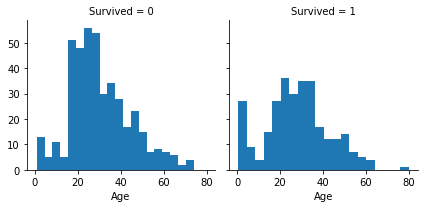

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = sns.FacetGrid(train_data, col='Survived')
fig.map(plt.hist, 'Age', bins=20)


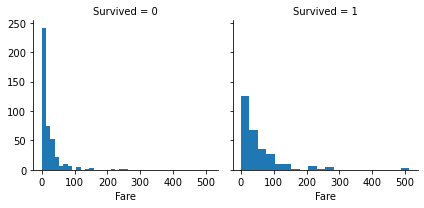

In [14]:
fig = sns.FacetGrid(train_data, col='Survived')
fig.map(plt.hist, 'Fare', bins=20)

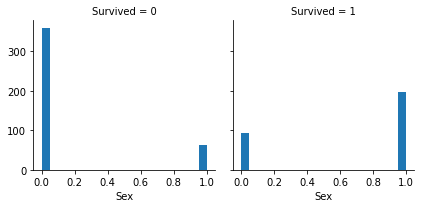

In [15]:
fig = sns.FacetGrid(train_data, col='Survived')
fig.map(plt.hist, 'Sex', bins=20)

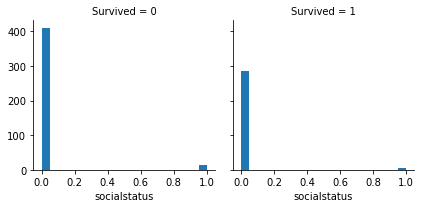

In [16]:
fig = sns.FacetGrid(train_data, col='Survived')
fig.map(plt.hist, 'socialstatus', bins=20)

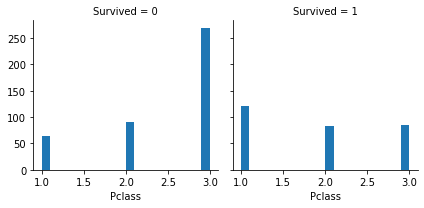

In [17]:
fig = sns.FacetGrid(train_data, col='Survived')
fig.map(plt.hist, 'Pclass', bins=20)

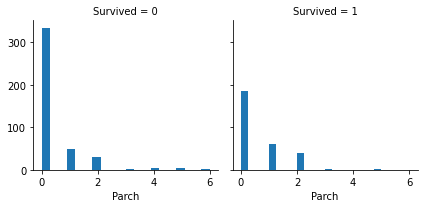

In [18]:
fig = sns.FacetGrid(train_data, col='Survived')
fig.map(plt.hist, 'Parch', bins=20)

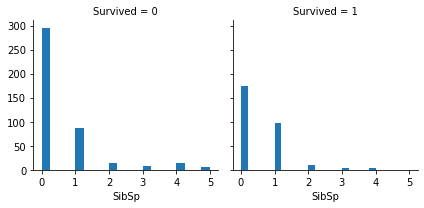

In [19]:
fig = sns.FacetGrid(train_data, col='Survived')
fig.map(plt.hist, 'SibSp', bins=20)

#### Seems like only Pclass, age, fare, and sex seems to have different distribution visibly that could have impacted survivability. Yet,
#### let us also keep encoded social status

### Q16 Keep only survived, Pclass, sex, Age, Fare and Social Status in the dataframe

In [20]:
df = train_data.drop(['Name','PassengerId','Parch','SibSp','Ticket','Cabin','Embarked','titles'], axis = 1)

test_df = test_data.drop(['Name','PassengerId','Parch','SibSp','Ticket','Cabin','Embarked','titles'], axis = 1)


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      714 non-null    int64  
 1   Pclass        714 non-null    int64  
 2   Sex           714 non-null    int64  
 3   Age           714 non-null    float64
 4   Fare          714 non-null    float64
 5   socialstatus  714 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 39.0 KB


### Q17 Reverese the ordering of the dataframe columns

In [22]:
df = df[['socialstatus', 'Fare', 'Age', 'Sex', 'Pclass','Survived']]
df2 = test_df[['socialstatus', 'Fare', 'Age', 'Sex', 'Pclass']]


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   socialstatus  714 non-null    int64  
 1   Fare          714 non-null    float64
 2   Age           714 non-null    float64
 3   Sex           714 non-null    int64  
 4   Pclass        714 non-null    int64  
 5   Survived      714 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 39.0 KB


### Q18 Assuming you build a ML model, split the dataframe into train and test data

In [24]:
import numpy as np

mask = np.random.rand(len(df))<=0.8
training_data = df[mask];
testing_data  = df[~mask];

print(len(training_data),len(testing_data))

587 127


### Q 19 Compute correlation between Pclass and Fare columns

In [25]:
df['Pclass'].corr(df['Fare'])

-0.5541824708598451

### Q 20 Build and run a ML Model on training and test split dataframes to predict survived column

In [26]:
X_train = np.array(training_data[['socialstatus','Fare','Age','Sex','Pclass']]);
y_train = np.squeeze(np.array(training_data[['Survived']]));
print(np.shape(X_train),np.shape(y_train));

X_test = np.array(testing_data[['socialstatus','Fare','Age','Sex','Pclass']]);
y_test = np.squeeze(np.array(testing_data[['Survived']]));
print(np.shape(X_test),np.shape(y_test));


(587, 5) (587,)
(127, 5) (127,)


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn import metrics 
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.7952755905511811


In [28]:
y_pred

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0], dtype=int64)

### Q 21 Use the ML model to create a csv in the format specified at Kaggle

In [29]:
# replace nan with median
df2['Age'] = df2['Age'].fillna(df2['Age'].median());
df2['Fare'] = df2['Fare'].fillna(df2['Fare'].median());
df2['socialstatus'] = df2['socialstatus'].fillna(0);

X = np.array(df2[['socialstatus','Fare','Age','Sex','Pclass']]);
y_pred = clf.predict(X)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': y_pred})
output.to_csv('submission.csv', index=False)